# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [33]:
# Question 1

import pandas as pd

nv = pd.read_csv('airbnb_hw.csv')
nv['Price'] = nv['Price'].replace({'\$':'', ',':''}) # Removes $ and , to convert each value into an integer
nv['price_nan'] = nv["Price"].isnull()

nv['Price'].head()

count = nv['price_nan'].value_counts()
print(count)


price_nan
False    30478
Name: count, dtype: int64


In [34]:
# Question 2

import pandas as pd

cv = pd.read_csv('mn_police_use_of_force.csv')
cv['subject_injury'] = cv['subject_injury'].str.lower().map({'yes': 'Yes', 'no': 'No', 'y': 'Yes', 'n': 'No'}).fillna('Unknown')

missing_injury = cv['subject_injury'].isnull().sum()
print(missing_injury)

cross_tab = pd.crosstab(cv['subject_injury'], cv['force_type'])
print(cross_tab)


0
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Unknown                              0                          170   
Yes                             

In [37]:
# Question 3

import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
dv = pd.read_csv(url, low_memory = False)

dv['WhetherDefendantWasReleasedPretrial'] = dv['WhetherDefendantWasReleasedPretrial'].map({True: 'Yes', False: 'No'})
dv['WhetherDefendantWasReleasedPretrial'] = dv['WhetherDefendantWasReleasedPretrial'].fillna('Unknown')

missing_released = dv['WhetherDefendantWasReleasedPretrial'].isna().sum()
print(f'Missing values in WhetherDefendantWasReleasedPretrial: {missing_released}')


Missing values in WhetherDefendantWasReleasedPretrial: 0


In [ ]:
# Question 4

import pandas as pd

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
mv = pd.read_csv(url, low_memory=False)

missing_sentence = mv['ImposedSentenceAllChargeInContactEvent'].isna().sum()
missing_sentence_type = mv['SentenceTypeAllChargesAtConvictionInContactEvent'].isna().sum()

print(f'Missing values in ImposedSentenceAllChargeInContactEvent: {missing_sentence}')
print(f'Missing values in SentenceTypeAllChargesAtConvictionInContactEvent: {missing_sentence_type}')

mv['ImposedSentenceAllChargeInContactEvent'] = mv.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentenceAllChargeInContactEvent'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

mv['ImposedSentenceAllChargeInContactEvent'].head()


Missing values in ImposedSentenceAllChargeInContactEvent: 0
Missing values in SentenceTypeAllChargesAtConvictionInContactEvent: 0


,ImposedSentenceAllChargeInContactEvent
0,
1,60
2,12
3,.985626283367556
4,


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

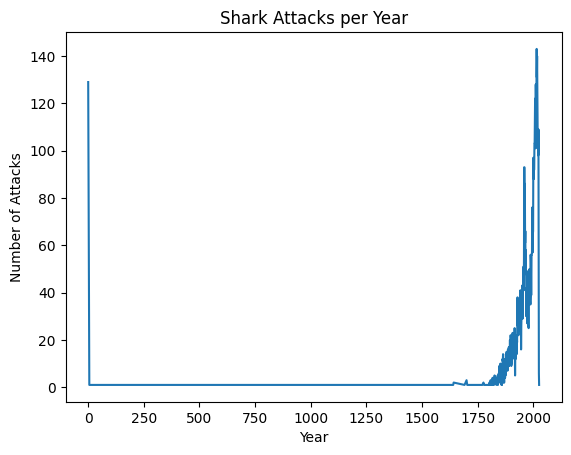

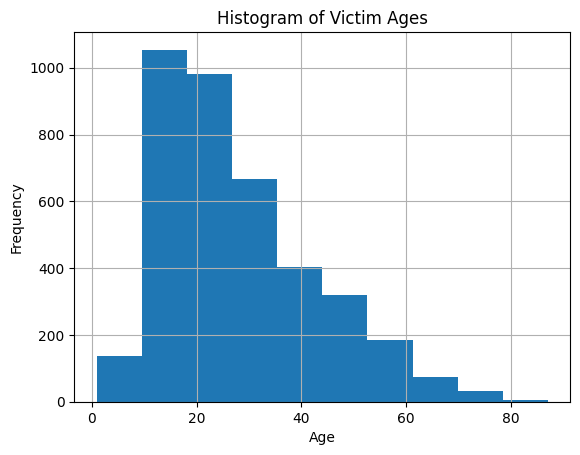

Proportion of male victims: 0.88
Proportion of unprovoked attacks: 0.90
Proportion of fatal attacks: 0.22
Proportion of unprovoked attacks by sex:
Sex
F    0.955072
M    0.888240
dtype: float64
Fatality rate based on attack type:
Fatal Y/N          N         Y
Type                          
Provoked    0.968254  0.031746
Unprovoked  0.756048  0.243952
Fatality rate based on sex:
Fatal Y/N         N         Y
Sex                          
F          0.836232  0.163768
M          0.769600  0.230400
Proportion of attacks by Great White Sharks: 0.10


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

sa = pd.read_excel('GSAF5.xls')
sa.dropna(axis = 1, how = 'all')

sa['Year'] = pd.to_numeric(sa['Year'], errors = 'coerce')

# Attacks are increasing

att_per_year = sa.groupby('Year').size()
att_per_year.plot(kind = 'line')
plt.title('Shark Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

# Victim ages

sa['Age'] = pd.to_numeric(sa['Age'], errors = 'coerce')

sa['Age'].hist()
plt.title('Histogram of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 88% of victims are male

sex = ['M', 'F']
sa = sa[sa['Sex'].isin(sex)]

male_victims = sa['Sex'].value_counts(normalize = True)['M']
print(f"Proportion of male victims: {male_victims:.2f}")

# 74% of attacks are unprovoked

types = ['Unprovoked', 'Provoked']
sa = sa[sa['Type'].isin(types)]

un_att = sa['Type'].value_counts(normalize = True)['Unprovoked']
print(f"Proportion of unprovoked attacks: {un_att:.2f}")

# 23% of attacks are fatal

fatalities = ['Y', 'N']
sa = sa[sa['Fatal Y/N'].isin(fatalities)]

fatalities = sa['Fatal Y/N'].value_counts(normalize = True)['Y']
print(f"Proportion of fatal attacks: {fatalities:.2f}")

# Unprovoked attacks are more likely to happen to females

unprovoked_by_sex = sa[sa['Type'] == 'Unprovoked'].groupby('Sex').size() / sa.groupby('Sex').size()
print("Proportion of unprovoked attacks by sex:")
print(unprovoked_by_sex)

# Unprovoked attacks are more fatal

fatal_by_type = sa.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()
print("Fatality rate based on attack type:")
print(fatal_by_type)

# Shark attacks involving males are more likely to be fatal

fatal_by_sex = sa.groupby('Sex')['Fatal Y/N'].value_counts(normalize=True).unstack()
print("Fatality rate based on sex:")
print(fatal_by_sex)

# I like sharks, you're more likely to be bitten by a dog

# 10% of attacks seem to be caused by Great White Sharks

sa.columns = sa.columns.str.strip()

sa['Species'] = sa['Species'].fillna('')
sa['Species'] = sa['Species'].str.split()

sa['Species'] = sa['Species'].apply(lambda x: ['GWS' if word.lower() in ['white', 'great'] else word for word in x])

white_sharks = sa['Species'].apply(lambda x: 'GWS' in x).mean()

print(f"Proportion of attacks by Great White Sharks: {white_sharks:.2f}")


In [23]:
sa.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

# Answers:
1. The paper is about how to clean messy datasets.
2. Intended to facilitate initial data exploration and analysis.
3. The first sentence means that each person who creates a dataset has a different way of causing "issues" for data scientists. For example, the way that NAs are represented can vary wildly. The second sentence refers to difficulties in verbalize what each instance of a value for a particular variable means.
4. Values are are what the dataset it comprised of, variables contain all values the measure the same attribute, and observations contain all values measured with the same unit across attributes.
5. Tidy data has a standard structure that makes it easy to extrat variables.
6. Problems with messy data include column headers, multiple variables in one column, variables stored in rows and columns, multiple units are stored in the same table, and single observational units are stored in different tables. Table 4 is messy because each column does not represent a variable nor does a row represent an observation, melting means swapping the rows and columns.
7. Table 11 is messy because each column is a possible day in a month, whereas table 12 has been tidied so that there is a column variable date which includes year, month, and day.
8. The "chicken-and-egg" problem is caused by the idea that tidy data is only as useful as the tools that work with it. Wickham hopes that better tools and data storage options will be developed in the future.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?